In [1]:
# TAREAS DE LOS MÓDULOS DE CNN Y RNN - MIAX9
# Para cada uno de los siguientes ejercicios entregar un fichero en ipython notebook  (.ipynb).
# En cada fichero tenéis que solucionar un ejercicio distinto, es importante que comentéis la
# solución que habéis realizado y los resultados obtenidos.
# El código ha de ser compilable desde Google Colab (utilizando el entorno de Colab), y no
# ha de contener errores. En los casos en los que se pide entrenar un modelo razona sobre
# la evolución del error de entrenamiento y de validación durante el entrenamiento.
# La práctica deberá realizarse de manera individual y debe entregarse en la plataforma de
# Instituto BME.

In [2]:
# 1.- Escribe un trozo de código que sirva para definir un modelo en Keras para solucionar
# cada uno de los siguientes problemas (solo tenéis que definir el modelo pero tiene que
# poder compilarse la celda, i.e. que no de error). Muestra el resumen del modelo por pantalla.
# - Tenemos un problema de clasificación de objetos donde tenemos 15000 imágenes de
# 32x32 en color. Para cada objeto tenemos una etiqueta numérica con valores de [0-50] (50
# clases de objetos distintas). Propon un modelo teniendo en cuenta lo que has aprendido en
# clase.
# - Tenemos 5000 datos de series temporales de un activo financiero, cada dato tiene una
# longitud de 11. Las salidas son las estimaciones de los valores del activo para el instante
# temporal siguiente. Escribe un trozo de código que sirva para definir un modelo en Keras
# que tenga al menos una capa LSTM, una capa GRU y una densa.
# - Tenemos 50000 datos de series temporales de 10 activos financieros de longitud 11.
# La salida son las 4 posibles fases del investment clock (reflation, recovery, overheat, y
# stagflation) para el instante temporal siguiente. Escribe un trozo de código que sirva para
# definir un modelo en Keras que combine al menos una capa LSTM, una convolucional y
# una densa e incluye algún tipo de regularización.

In [3]:
# - Tenemos un problema de clasificación de objetos donde tenemos 15000 imágenes de
# 32x32 en color. Para cada objeto tenemos una etiqueta numérica con valores de [0-50] (50
# clases de objetos distintas). Propon un modelo teniendo en cuenta lo que has aprendido en
# clase.

# Pues es equivalente a el notebook CNN_cifar100_tf2 que procesa para X_train (50000, 32, 32, 3) (#datos,#lado,#alto,#canales)
# El 3 canales es poruqe es en color RGB .
# Entiendo que solo se pide el model y nada de ver metricas y provarlo. Considero:
#     1.- Dividir los valores en train, test, validation se ha de hacer.
#     2.- Procesar las salidas a categorical. Considero que el modelo entiende que las salidas han de relacionarse con 
#     un categorical como en el ejemplo notebook CNN_cifar100_tf2 ya que tiene  de 0 a 49 etiquetas.
#     3.- los 15000 imagenes, considero que usaremos alrededor de 10000 imagenes para train. Entonces entiendo que 
#     para el entrenamiento se deberia usar como maximo  10000*0.1 = 1000 parametros.
#     Por lo tanto, el model lo hago para que no tenga mas de 307200 parametros para este ejemplo ( que no lo tengo que hacer funcionar entiendo).
#     4.- Siempre hemos usado como optimizador en Adam por defecto. Se uede usar otros; pero para este ejemplo Adam sirve.
#     5.- Al ser un problema de clasificacion multiclase, la primera opcion para la funcion de coste es que ha de ser cross-entropy
#     (Clasificación:Crossentropy (Binary, Categorical, Sparse))y como la salida son categorical, pues es la categorical_crossentropy.
#     6.- Considero como primera ( y casi unica) opcion por ser un problema de clasificacion multiclase con categorical, que la salida
#     de la red ha de ser softmax'.
#     7.- Uso por defecto a metrica accuracy.
#     8.- Al ser la salida de 0-49; se ha de tener en la capa d esalida densa 50 neuronas.
#     9.- Por defecto uso Relu


2.11.0
169001437/169001437 [==============================] - 5s 0us/step
(50000, 32, 32, 3)
99
49
49


((50000, 32, 32, 3), (50000, 50), (10000, 32, 32, 3), (10000, 50))

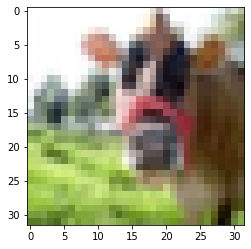

In [4]:
# para ver cuantos parametros me sale uso tf.keras.datasets.cifar100.load_data()
from __future__ import absolute_import, division, print_function, unicode_literals
# Installa TensorFlow
#%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)
 # descargamos los datos cifar100 y los partimos en train y test
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar100.load_data()
# Tamaño de los datos (#datos,#lado,#alto,#canales)
print(X_train.shape),print(y_train.max())
X_train = X_train/255
X_test = X_test/255
import matplotlib.pyplot as plt
# enseñamos la primera imagen del dataset
plt.imshow(X_train[0],cmap="gray")


# hago una trampa para estar seguro que el programa ( aunque no tiene sentido si lo hiciera correrr)
# que es que todas las etiqueasa de 50 a 99 cambien a valor 49. Y asi me sale ul categorical de 0 a 49.
# solo para ver que el modelo va bien bien
for i in range(0,len(y_train)):
    if y_train[i] >49:
       y_train[i] = 49 
for i in range(0,len(y_test)):
    if y_test[i] >49:
       y_test[i] = 49 
print(y_train.max())
print(y_test.max())
# one-hot encoding en las 'y'
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

In [5]:
# ejemplo de una capa densa y una Conv2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, BatchNormalization, MaxPooling2D

model = Sequential()
# ponemos dos capas de convolución, una flatten y una densa
model.add(Conv2D(1, kernel_size=3, activation='relu', input_shape=(32,32,3), padding='valid'))
#model.add(Dropout(0.5))
#model.add(Conv2D(10, kernel_size=3, activation='relu'))
#model.add(BatchNormalization())
#model.add(MaxPooling2D(2))
#model.add(Conv2D(20, kernel_size=3, activation='relu'))
#model.add(Conv2D(32, kernel_size=7, activation='relu'))
model.add(Flatten())
model.add(Dense(50, activation='softmax'))
# Compilamos el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Este es el modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 1)         28        
                                                                 
 flatten (Flatten)           (None, 900)               0         
                                                                 
 dense (Dense)               (None, 50)                45050     
                                                                 
Total params: 45,078
Trainable params: 45,078
Non-trainable params: 0
_________________________________________________________________


In [6]:
#uso el ejemplo de CNN_cifar100_tf2_clase pare ver que el modelo funciona bien bien; aunque esta claro qeu ya el modelo compila

# Vamos a usar el callback de earlystopping
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=12, min_delta=0.01)
# Entrenamos
hist = model.fit(X_train, y_train, validation_split=0.1, epochs=50, callbacks=[early_stopping])

Epoch 1/50
1407/1407 [==============================] - 16s 4ms/step - loss: 2.6338 - accuracy: 0.5077 - val_loss: 2.5338 - val_accuracy: 0.5166
Epoch 2/50
1407/1407 [==============================] - 5s 3ms/step - loss: 2.4975 - accuracy: 0.5103 - val_loss: 2.4747 - val_accuracy: 0.5162
Epoch 3/50
1407/1407 [==============================] - 6s 4ms/step - loss: 2.4425 - accuracy: 0.5112 - val_loss: 2.4659 - val_accuracy: 0.5158
Epoch 4/50
1407/1407 [==============================] - 5s 4ms/step - loss: 2.4038 - accuracy: 0.5130 - val_loss: 2.4688 - val_accuracy: 0.5166
Epoch 5/50
1407/1407 [==============================] - 5s 3ms/step - loss: 2.3750 - accuracy: 0.5139 - val_loss: 2.4717 - val_accuracy: 0.5178
Epoch 6/50
1407/1407 [==============================] - 6s 4ms/step - loss: 2.3495 - accuracy: 0.5152 - val_loss: 2.4856 - val_accuracy: 0.5154
Epoch 7/50
1407/1407 [==============================] - 5s 4ms/step - loss: 2.3277 - accuracy: 0.5155 - val_loss: 2.4814 - val_accuracy

In [7]:
# como se ve en el ejemplo con una capa densa y una Conv2D, me salen demasiados parametros para entrenar 45,078.
# esto son mas que 50000*10%. Para empezar, entiendo que este modelo valdria.
# Evidentemento hay miles de modelos que valdrian.
# El modelo compila y tiene sentido.
# Esto se puede desarrollar hasta el infinito ( modelo y explicaciones); pero entiendo que solo se pide un modelo logico que compile.

In [8]:
# - Tenemos 5000 datos de series temporales de un activo financiero, cada dato tiene una
# longitud de 11. Las salidas son las estimaciones de los valores del activo para el instante
# temporal siguiente. Escribe un trozo de código que sirva para definir un modelo en Keras
# que tenga al menos una capa LSTM, una capa GRU y una densa.

# Esto es parecido a lo que vimos en clase y lo tenemos en el notebook Keras_RNN_Stock_Market_clase.
# Entiendo que solo se pide el model y nada de ver metricas y provarlo. Considero:
#     1.- Dividir los valores en train, test, validation se ha de hacer.
#     2.- Procesar las salidas normalizandolas con la misma normalizacion que use para los valores de entrenamiento. Los modelos de NN
#     esperan valores cercanos a 0,1,-1... No muy altos para que el entrenamiento se amas efectivo
#     3.- los 5000 datos, considero que usaremos alrededor de bloques de 5000/11  = 450 bloques de 11 datos ( 10 para entrenamiento y el onceavo 
#     es el valor que se intenta estimar. Si considero que la red debe tener un 10% como maximo de parametros para entrenar y los bloques de 10
#     datos que usara para entrenar serian unos 450 * 70% = 315; entonces considero qeu tengo como 315*10 = 3150 numeros de datos. Asi 
#     que el model no ha de tener mas de 315 parametros para ser entrenados
#     4.- Siempre hemos usado como optimizador en Adam por defecto. Se puede usar otros; pero para este ejemplo Adam sirve.
#     5.- Al ser un problema de regresion, la funcion de coste deberia ser MSE (loss = 'mean_squared_error') y la salida de la red lineal ( sin
#     funcion de activacion). En clase de RNN y CNN hemos usado en el ejemplo  Keras_RNN_Stock_Market_clase el loss='mae'. Pero yo
#     prefiero usar loss = 'mean_squared_error' pq cOincide con lo que nOS has explicado al detalle de redes densas en problemas
#     de regresion. Segun inTernet:
#     5.1 MSE is the abbreviation for Mean Squared Error. The L2 loss function is another name for it. For regression tasks, 
#     it is a popular choice of loss function. It is, however, more sensitive to outliers.
#     5.2 MAE is the abbreviation for Mean Absolute Error. The L1 loss function is another name for it. When a dataset has a 
#     large number of outlier cases, it is sometimes employed as an alternative to the MSE.
#     En conclusion; uso loss = 'mean_squared_error' ya que lo entiendo mejor por la clase de Redes neuronales densas. Pero entiendo
#     que tambien puedo usar MAE.
#     6.- Uso por defecto a metrica accuracy.
#     7.- La capa de entrada a de tener las dimensions del bloque de entrada de datos



In [9]:
# para ver cuantos parametros me sale y el modelo funciona bien bien; uso lo que he echo en el ejercicio 3 pero me quedo
# con un periodo de 5000 datos de open de Microsoft


In [10]:
#from __future__ import absolute_import, division, print_function, unicode_literals
# Installa TensorFlow
# %tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv1D, GRU, LSTM, Flatten
import numpy as np
import pandas as pd

2.11.0


(7983,)
(7983,)
(7983,)
(5000, 1)


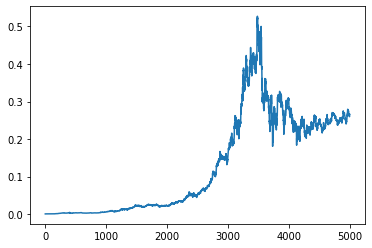

In [11]:
def sacar_open_Microsoft_normalizado_y_con_numero_de_valores ():
    # Para leer datos lo mejor es usar la toolbox pandas
    # Los datos se han sacado de:
    # https://www.kaggle.com/borismarjanovic/price-volume-data-for-all-us-stocks-etfs/version/3
    dd_msft = pd.read_csv("msft.us.txt", delimiter=",")
    msft_op = dd_msft['Open'].values
    print(msft_op.shape)
    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.figure()
    plt.plot(msft_op)
    
    DAT = msft_op
    print(DAT.shape)

    
    
    #deberia normalizar entre 0 y 1; que se haria de forma facil
    # # Normalizo los valores para que trabaje de 0 a 1 luego el nn.
    valor_a_normalizar = DAT.max()
    DAT = DAT/ valor_a_normalizar
    # Los ploteo
    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.figure()
    plt.plot(DAT)
    print(DAT.shape)

    # Los coloco todos juntos en un dataset. Asi luego me sale tambien los numeros de variables que lo nesitla el model  convolucional
    # DAT = np.zeros((data_googl.shape[0],3))
    #DAT_1 = np.zeros((msft_op.shape[0],1)) # MODIFICADO PARA QUE DE 5000
    DAT_1 = np.zeros((5000,1)) # CREADO PARA QUE DE 5000
    
    #DAT[:,0] = data_googl
    #DAT[:,1] = data_aa
    #DAT[:,2] = data_iae
    # DAT_1[:,0] = DAT # MODIFICADO PARA QUE DE 5000
    DAT_1[:,0] = DAT[0:5000] # CREADO PARA QUE DE 5000
    # Los ploteo
    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.figure()
    plt.plot(DAT_1[:,0])
    print(DAT_1.shape)
    
    return DAT_1

DAT_1 = sacar_open_Microsoft_normalizado_y_con_numero_de_valores ()

In [12]:
def Reordeno_dataset_en_bloques_LAG_dias_y_siguiente_dia_predice_y_split(LAG,DAT_1):
    # Reordeno el dataset para hacer bloques de LAG dias
    #LAG = 11
    DAT_TS = np.zeros((DAT_1.shape[0]-LAG,LAG,DAT_1.shape[1]))

    for ii in range(0,DAT_1.shape[0]-LAG):
        DAT_TS[ii,:,:] = DAT_1[ii:ii+LAG,:]
    # Tengo (#muestras,#longitud,#variables)
    DAT_TS.shape, DAT_TS[700]

    #Separaro todo el dataset en los datos de apertura de 10 días anteriores para estimar el valor del día
    #actual
    #Ntr = np.floor(DAT_TS.shape[0]/2)
    Ntr = np.floor(DAT_TS.shape[0])
    data_x = DAT_TS[range(0,np.int(Ntr)),0:LAG-1,:]

    Y_target = 0
    data_y = DAT_TS[range(0,np.int(Ntr)),LAG-1,Y_target]

    data_x.shape, data_y.shape


    #hago el split de train y test
    from sklearn.model_selection import train_test_split
    x_train, x_test, t_train, t_test = train_test_split(data_x, data_y, test_size=0.33, random_state=12)
    print(x_train.shape)
    print(x_test.shape)
    print(t_train.shape) 
    print(t_test.shape)
    return x_train, x_test, t_train, t_test
x_train, x_test, t_train, t_test = Reordeno_dataset_en_bloques_LAG_dias_y_siguiente_dia_predice_y_split(LAG = 11,DAT_1 = DAT_1)


<ipython-input-12-a052ba579459>:15: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_x = DAT_TS[range(0,np.int(Ntr)),0:LAG-1,:]
<ipython-input-12-a052ba579459>:18: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in Nu

(3342, 10, 1)
(1647, 10, 1)
(3342,)
(1647,)


In [13]:
# Asi que el x_train tiene dimensiones (3342, 10, 1) para entrenar. Entonces entiendo que tengo datos hasta 3342*10 = 33420.
# Asi que entiendo que mi modelo no ha de tener mas del 10% de ese valor; es decir no mas de parametros a entrenar de 3242
x_train_sin_tercera_dimension = x_train[:,:,0]
x_test_sin_tercera_dimension = x_test[:,:,0]
x_train_sin_tercera_dimension.shape, x_test_sin_tercera_dimension.shape
# le quito la tercera dimension a x_train y a x_test_ para que me cuadre con la capa GRU que he creado con entrada input_shape=(10,1).
# Podia haber cambiado cambien el modelo; pero me parece mas elegante asi.

((3342, 10), (1647, 10))

In [14]:
# Modelo Básico GRU + Densa y  #Modelo equivalente en dimensiones usando 1 convolucional + LSTM + Dens
model = Sequential()
model.add(GRU(15, input_shape=(10,1),return_sequences=True))
model.add(LSTM(5))
model.add(Flatten())
model.add(Dense(1))
#model.compile(optimizer='adam',loss='mae')
#model.summary()

# Compilamos el modelo
model.compile(optimizer='adam', loss = 'mean_squared_error', metrics=['accuracy'])
# Este es el modelo
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 10, 15)            810       
                                                                 
 lstm (LSTM)                 (None, 5)                 420       
                                                                 
 flatten_1 (Flatten)         (None, 5)                 0         
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 1,236
Trainable params: 1,236
Non-trainable params: 0
_________________________________________________________________


In [15]:
# me salen Trainable params: 1,236; que es bantante menos de los 3242 del 10% de datos para train.
# Asi que sigo a ver si el modelo funciona con el ejemplo que le he preparado con 5000 datos de microsoft en paquetes de 10 datos

In [16]:
# Vamos a usar el callback de earlystopping
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=12, min_delta=0.01)
# Entrenamos
hist = model.fit(x_train_sin_tercera_dimension, y_train, validation_split=0.1, epochs=50, callbacks=[early_stopping])

Epoch 1/50
94/94 [==============================] - 7s 14ms/step - loss: 0.0201 - accuracy: 0.9800 - val_loss: 0.0196 - val_accuracy: 0.9800
Epoch 2/50
94/94 [==============================] - 1s 7ms/step - loss: 0.0196 - accuracy: 0.9800 - val_loss: 0.0196 - val_accuracy: 0.9800
Epoch 3/50
94/94 [==============================] - 1s 7ms/step - loss: 0.0196 - accuracy: 0.9800 - val_loss: 0.0196 - val_accuracy: 0.9800
Epoch 4/50
94/94 [==============================] - 1s 7ms/step - loss: 0.0196 - accuracy: 0.9800 - val_loss: 0.0196 - val_accuracy: 0.9800
Epoch 5/50
94/94 [==============================] - 1s 6ms/step - loss: 0.0196 - accuracy: 0.9800 - val_loss: 0.0196 - val_accuracy: 0.9800
Epoch 6/50
94/94 [==============================] - 1s 7ms/step - loss: 0.0196 - accuracy: 0.9800 - val_loss: 0.0196 - val_accuracy: 0.9800
Epoch 7/50
94/94 [==============================] - 1s 6ms/step - loss: 0.0196 - accuracy: 0.9800 - val_loss: 0.0196 - val_accuracy: 0.9800
Epoch 8/50
94/94 [=

In [17]:
# modelo compila.
# Esta pensado; pq cuando se dijo en la clase el enunciado no pareciA bien; considerando datos de entrada temporal de 10 y el 
# onceavo es el que se ha de usar para y_trai o y_test. Tienen GRU, LSTM y una densa. Entiendo que he cumplido con elenunciado
# y he probado que el modelo complila y ademas funciona para un ejemplo. Eso se puede alargar y extender mucho; pero entiendo 
# que cubro con lo que se pide

In [18]:
# - Tenemos 50000 datos de series temporales de 10 activos financieros de longitud 11.
# La salida son las 4 posibles fases del investment clock (reflation, recovery, overheat, y
# stagflation) para el instante temporal siguiente. Escribe un trozo de código que sirva para
# definir un modelo en Keras que combine al menos una capa LSTM, una convolucional y
# una densa e incluye algún tipo de regularización.

In [19]:
# Esto no es parecido a lo que vimos en clase EXACTAMENTE; PERO ES UN TIPO DE CLASIFICACION MULTICLASE ( DE 4 SALIDAS).
# Entiendo que solo se pide el model y nada de ver metricas y provarlo. Considero:
# 1.- Las t_testy y y_train han de cambiarse a categorical; es lo mejor. Y asi se asemeja el modelo en la salida al primero de este ejercicio [0-49]
# 2.- Dividir los valores en train, test, validation se ha de hacer.
# 3.- Procesar las salidas a categorical. Considero que el modelo entiende que las salidas han de relacionarse con 
# un categorical como en el ejemplo notebook CNN_cifar100_tf2 ya que tiene  de 0 a 49 etiquetas; pero en este caso 0,1,2 y 3.
# 4.- De los 50000 datos, considero que para entrenamiento voy a usar un 70%; es decir 35.000 datos. Entonces los parametros 
# a entrenar no an de ser mayora 3500.  
# 5.- Siempre hemos usado como optimizador en Adam por defecto. Se puede usar otros; pero para este ejemplo Adam sirve.
# Al ser un problema de clasificacion multiclase, la primera opcion para la funcion de coste es que ha de ser cross-entropy
# (Clasificación:Crossentropy (Binary, Categorical, Sparse))y como la salida son categorical, pues es la categorical_crossentropy.
# Considero como primera ( y casi unica) opcion por ser un problema de clasificacion multiclase con categorical, que la salida
# de la red ha de ser softmax'.
# 6.- Al ser la salida de 0-3; se ha de tener en la capa de salida densa 4 neuronas.
# 7.- La capa de entrada a de tener las dimensions del bloque de entrada de datos. Entiendo que son bloques de 10; ya que el eneunciado no estaba bien.
# 8. Por defecto uso Relu en las capas ocultas. No lo he puesto pero da lo mismo ya que compularar

(7983,)
(7983,)
(7983,)
(5000, 1)
(3342, 10, 1)
(1647, 10, 1)
(3342,)
(1647,)


<ipython-input-12-a052ba579459>:15: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_x = DAT_TS[range(0,np.int(Ntr)),0:LAG-1,:]
<ipython-input-12-a052ba579459>:18: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in Nu

((3342, 10), (1647, 10))

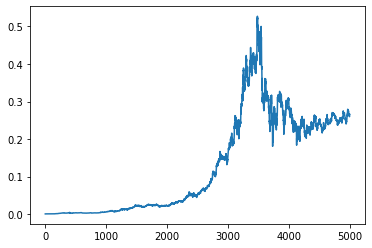

In [20]:
# Para ver que el modelo funciona, me hecho este ejemplo
DAT_1 = sacar_open_Microsoft_normalizado_y_con_numero_de_valores ()
x_train, x_test, t_train, t_test = Reordeno_dataset_en_bloques_LAG_dias_y_siguiente_dia_predice_y_split(LAG = 11,DAT_1 = DAT_1)
x_train_sin_tercera_dimension = x_train[:,:,0]
x_test_sin_tercera_dimension = x_test[:,:,0]
x_train_sin_tercera_dimension.shape, x_test_sin_tercera_dimension.shape
#x_train_sin_tercera_dimension = x_train[:,:,0]
#x_test_sin_tercera_dimension = x_test[:,:,0]
#x_train_sin_tercera_dimension.shape, x_test_sin_tercera_dimension.shape

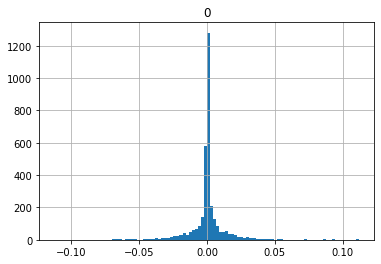

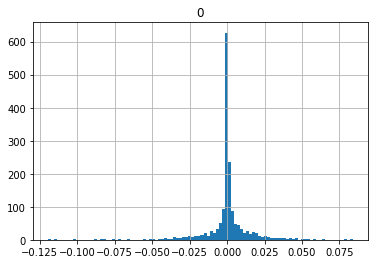

In [21]:
# si tomo como ejemplo los x_train, x_test, t_train, t_test del punto anterior y redefino; 
# para que haya 4 valores de salida solamente,  yresto el valor de t menos el del dia primero 
# de la serie me sale
diferencias_train = pd.DataFrame(t_train-x_train[:,0,0])
diferencias_test = pd.DataFrame(t_test-x_test[:,0,0])
diferencias_train.hist(bins=100)
diferencias_test.hist(bins=100)
# entonces pogo valores 0,1,2,3 en t_train, t_test que 
# 0 cuando t_train-x_train[:,0,0] o (t_test-x_test[:,0,0] < -0.05
# 1 cuando t_train-x_train[:,0,0] o (t_test-x_test[:,0,0] > -0.05 y < 0
# 2 cuando t_train-x_train[:,0,0] o (t_test-x_test[:,0,0] > 0 y < 0.05
# 5 cuando t_train-x_train[:,0,0] o (t_test-x_test[:,0,0] > 0.05
for i in range (0,len(diferencias_train)):
    if diferencias_train.iloc[i,0] <= -0.05:
        t_train[i] = 0
    if -0.05 < diferencias_train.iloc[i,0]  <= 0:
        t_train[i] = 1
    if 0 < diferencias_train.iloc[i,0]  <= 0.05:
        t_train[i] = 2
    if diferencias_train.iloc[i,0]  > 0.05:
        t_train[i] = 3
t_train
for i in range (0,len(diferencias_test)):
    if diferencias_test.iloc[i,0] <= -0.05:
        t_test[i] = 0
    if -0.05 < diferencias_test.iloc[i,0]  <= 0:
        t_test[i] = 1
    if 0 < diferencias_test.iloc[i,0]  <= 0.05:
        t_test[i] = 2
    if diferencias_test.iloc[i,0]  > 0.05:
        t_test[i] = 3
t_train, t_test
# pues ya pudeo ver si el modelo funciona
# y los paso a categorical
from tensorflow.keras.utils import to_categorical
t_train_cat = to_categorical(t_train)
t_test_cat = to_categorical(t_test)
#y_train, y_test

In [22]:
x_train.shape, x_test.shape, t_train.shape, t_test.shape, t_train_cat.shape, t_test_cat.shape

((3342, 10, 1), (1647, 10, 1), (3342,), (1647,), (3342, 4), (1647, 4))

In [23]:


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv1D, Conv2D, LSTM
from tensorflow.keras import regularizers
import numpy as np

# Definimos un modelo con una capa convolucional 2D y 1 capa densa

# ver que era el  XX_tr.shape[1:]
model = Sequential()
#model.add(Conv2D(5, kernel_size=3, activation='relu', input_shape=(32,32,3), padding='valid'))
#model.add(Conv2D(11, 10, input_shape=x_train.shape[1:], activity_regularizer=regularizers.l1(0.2), padding='same'))
model.add(Conv1D(10, 3, input_shape=x_train.shape[1:],padding='same'))
model.add(LSTM(5))
model.add(Flatten())
model.add(Dense(4, kernel_regularizer = regularizers.L1(1e-3), activation='softmax'))

# Compilamos el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Este es el modelo
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 10, 10)            40        
                                                                 
 lstm_1 (LSTM)               (None, 5)                 320       
                                                                 
 flatten_2 (Flatten)         (None, 5)                 0         
                                                                 
 dense_2 (Dense)             (None, 4)                 24        
                                                                 
Total params: 384
Trainable params: 384
Non-trainable params: 0
_________________________________________________________________


In [24]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=12, min_delta=0.01)
# Entrenamos
hist = model.fit(x_train, t_train_cat, validation_split=0.1, epochs=50, callbacks=[early_stopping])

Epoch 1/50
94/94 [==============================] - 3s 11ms/step - loss: 1.2706 - accuracy: 0.5155 - val_loss: 1.0922 - val_accuracy: 0.5343
Epoch 2/50
94/94 [==============================] - 1s 5ms/step - loss: 0.9599 - accuracy: 0.5377 - val_loss: 0.8642 - val_accuracy: 0.5343
Epoch 3/50
94/94 [==============================] - 1s 6ms/step - loss: 0.8366 - accuracy: 0.5377 - val_loss: 0.7991 - val_accuracy: 0.5343
Epoch 4/50
94/94 [==============================] - 1s 6ms/step - loss: 0.8001 - accuracy: 0.5377 - val_loss: 0.7763 - val_accuracy: 0.5343
Epoch 5/50
94/94 [==============================] - 1s 5ms/step - loss: 0.7869 - accuracy: 0.5377 - val_loss: 0.7663 - val_accuracy: 0.5343
Epoch 6/50
94/94 [==============================] - 1s 6ms/step - loss: 0.7813 - accuracy: 0.5377 - val_loss: 0.7611 - val_accuracy: 0.5343
Epoch 7/50
94/94 [==============================] - 1s 5ms/step - loss: 0.7782 - accuracy: 0.5377 - val_loss: 0.7580 - val_accuracy: 0.5343
Epoch 8/50
94/94 [=

In [25]:
# Asi que el modelo compila y parece que funciona. Creo que cumplo con el enunciado del problema.